# RandomForestClassifier

Задача бинарной классификации изображений для компьютерного зрения робота. На вход подается изображение с камеры робота, а на выходе вероятность нахождения людей и/или животных на кадре. В зависимости от вероятности будет приниматься решение дальнейшего движения робота.

Этапы решения задачи:

1. Сформировать датасет
2. Построить модель

Решение поставленной задачи третим способом: RandomForestClassifier. В качестве датасета использованы фотографии из личного архива. В обучающей выборке 4000 фотографий разделенных на два класса. В проверочной выборке 612 фотографий разделенных на два класса. В тестовой выборке 60 фотографий. Обучение модели производилось в среде Google Colab, так как нет достаточной вычислительной мощности на домашнем компьютере. На тестовом наборе модель показала точность 0.67. Так же использованы 24 фотографии для демонстрации работы модели.

In [5]:
from sklearn.ensemble import RandomForestClassifier
import os, shutil, pathlib
from tensorflow.keras.utils import image_dataset_from_directory
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from keras.preprocessing import image 
from tensorflow.keras import utils

%matplotlib inline

In [6]:
base_dir = pathlib.Path(dataset_path)

img_size = (150, 150)

#Генератор изображений

train_gen = image_dataset_from_directory(
    base_dir / "train",
    image_size = img_size,
    color_mode = 'grayscale',
    shuffle = True,
    batch_size = 1 )


#Создание обучающего датасета
x_train_list = []
y_train_list = []

for data_batch, labels_batch in train_gen:
    x = data_batch.numpy().reshape(1, -1)
    x_train_list.append(x[0])
    y_train_list.append(labels_batch.numpy()[0])
   
print('Загрузка завершена \n')
print('x_train len = ', len(x_train_list))
print('y_train_len = ', len(y_train_list))

x_train = np.array(x_train_list)
y_train = np.array(y_train_list)

Found 4000 files belonging to 2 classes.
x_train len =  4000
y_train_len =  4000


In [7]:
x_train.shape

(4000, 22500)

In [8]:
y_train[:10]

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1])

размер пакета: (1, 150, 150, 1)
метка изображения : 0


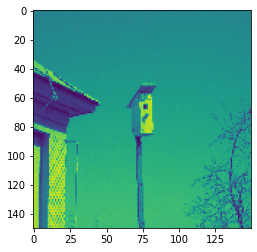

In [12]:
#случайное изображение
for data_batch, labels_batch in train_gen:
    print("размер пакета:", data_batch.shape)
    print("метка изображения :", labels_batch.numpy()[0])
    plt.imshow(image.image_utils.array_to_img(data_batch.numpy()[0]))
    break

#Модель №3 - случайный лес

In [14]:
clf = RandomForestClassifier(n_estimators = 1000, max_depth=50, random_state=0, n_jobs = -1)
clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=50, n_estimators=1000, n_jobs=-1,
                       random_state=0)

Демонстрация работы модели

Found 24 files belonging to 1 classes.
№ файла:  1
Вероятность нахождения людей и/или животных =  0.5897


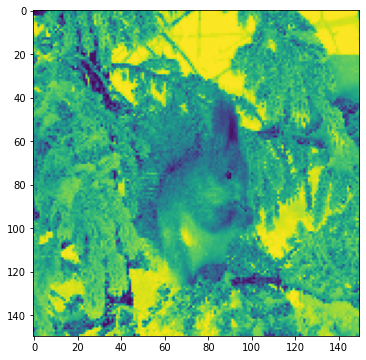

----------------------------------
№ файла:  2
Вероятность нахождения людей и/или животных =  0.3837


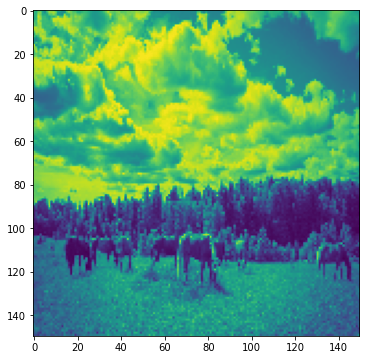

----------------------------------
№ файла:  3
Вероятность нахождения людей и/или животных =  0.4565


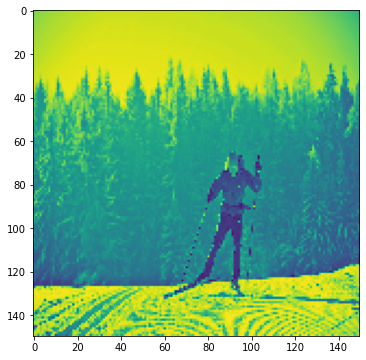

----------------------------------
№ файла:  4
Вероятность нахождения людей и/или животных =  0.1685


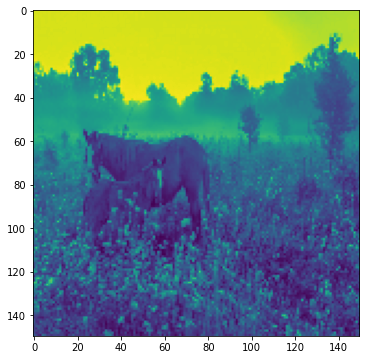

----------------------------------
№ файла:  5
Вероятность нахождения людей и/или животных =  0.303


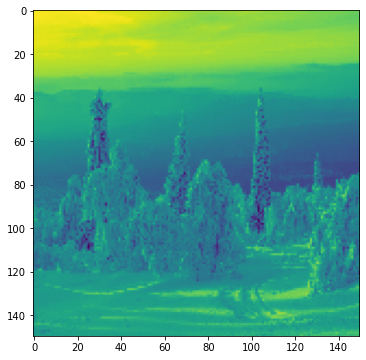

----------------------------------
№ файла:  6
Вероятность нахождения людей и/или животных =  0.3763


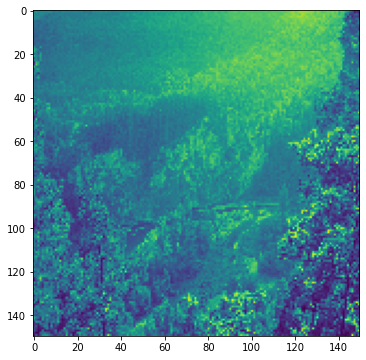

----------------------------------
№ файла:  7
Вероятность нахождения людей и/или животных =  0.5615


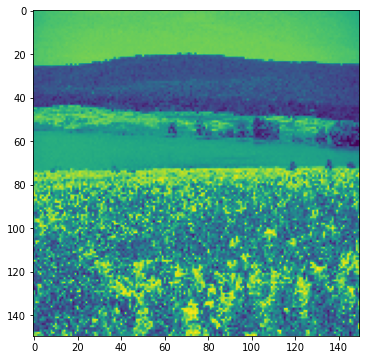

----------------------------------
№ файла:  8
Вероятность нахождения людей и/или животных =  0.574


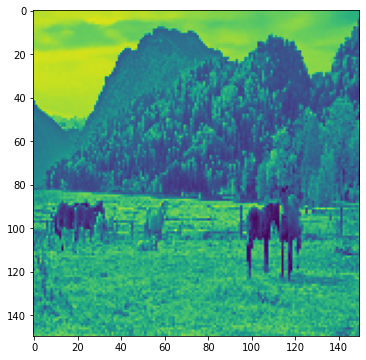

----------------------------------
№ файла:  9
Вероятность нахождения людей и/или животных =  0.7078


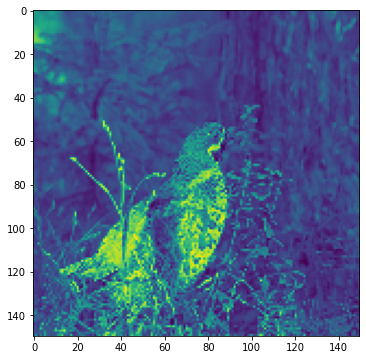

----------------------------------
№ файла:  10
Вероятность нахождения людей и/или животных =  0.2095


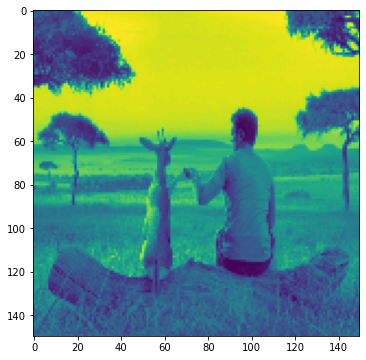

----------------------------------
№ файла:  11
Вероятность нахождения людей и/или животных =  0.6401


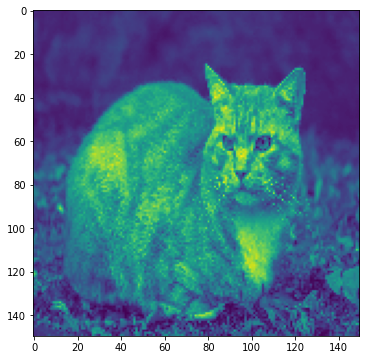

----------------------------------
№ файла:  12
Вероятность нахождения людей и/или животных =  0.6797


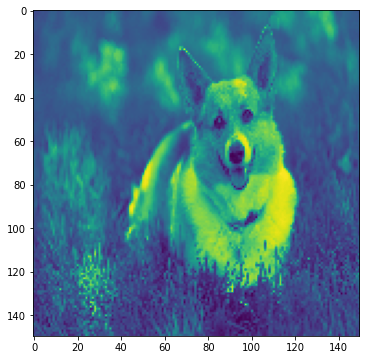

----------------------------------
№ файла:  13
Вероятность нахождения людей и/или животных =  0.7698


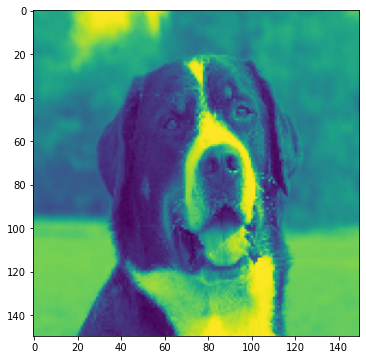

----------------------------------
№ файла:  14
Вероятность нахождения людей и/или животных =  0.572


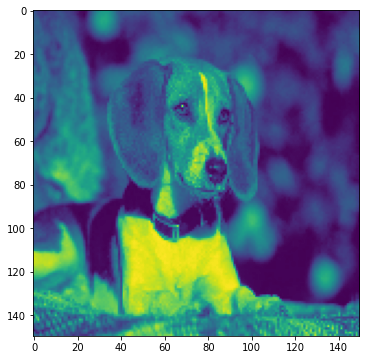

----------------------------------
№ файла:  15
Вероятность нахождения людей и/или животных =  0.5097


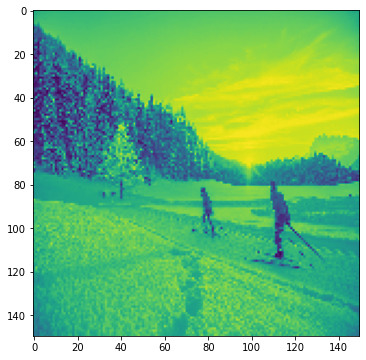

----------------------------------
№ файла:  16
Вероятность нахождения людей и/или животных =  0.4696


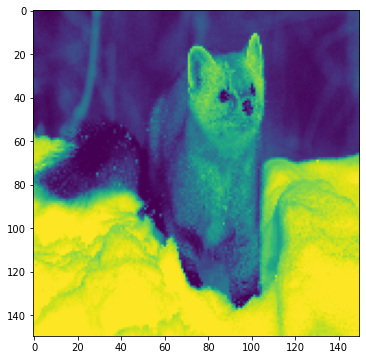

----------------------------------
№ файла:  17
Вероятность нахождения людей и/или животных =  0.4545


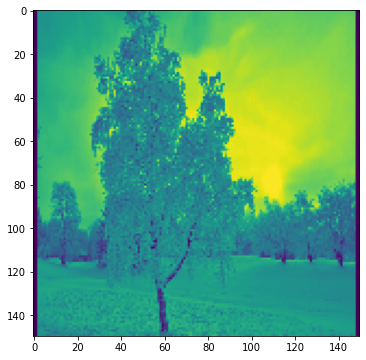

----------------------------------
№ файла:  18
Вероятность нахождения людей и/или животных =  0.7154


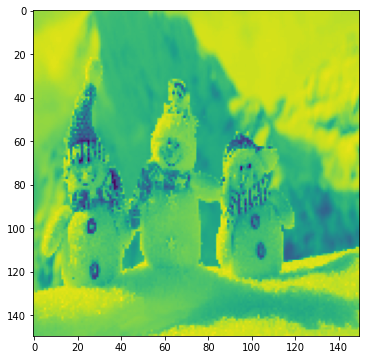

----------------------------------
№ файла:  19
Вероятность нахождения людей и/или животных =  0.6145


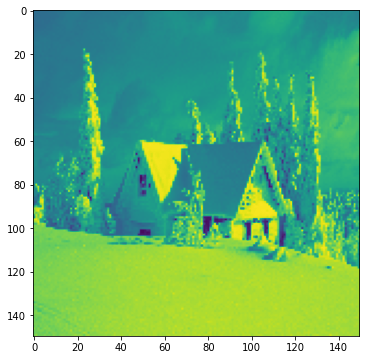

----------------------------------
№ файла:  20
Вероятность нахождения людей и/или животных =  0.733


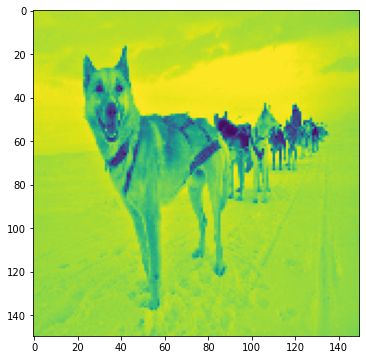

----------------------------------
№ файла:  21
Вероятность нахождения людей и/или животных =  0.7045


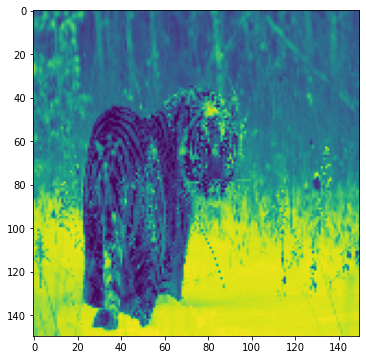

----------------------------------
№ файла:  22
Вероятность нахождения людей и/или животных =  0.5742


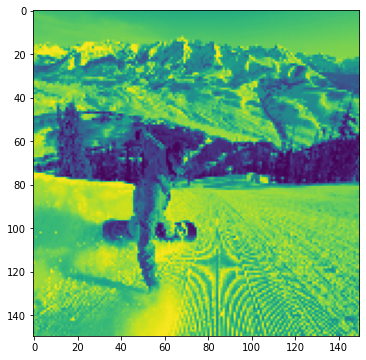

----------------------------------
№ файла:  23
Вероятность нахождения людей и/или животных =  0.7115


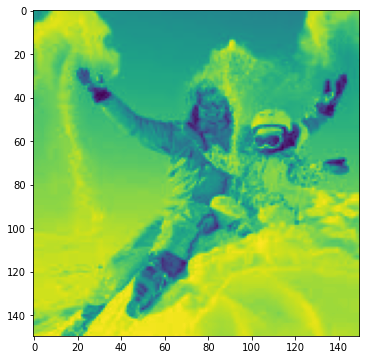

----------------------------------
№ файла:  24
Вероятность нахождения людей и/или животных =  0.3925


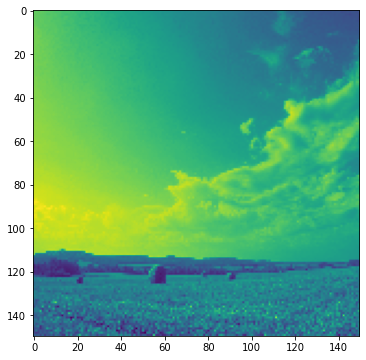

----------------------------------


In [15]:
#Генератор для предсказаний
base_dir = pathlib.Path(dataset_path)
predict_gen = image_dataset_from_directory(
    base_dir / "predict",
    image_size = img_size,
    color_mode = 'grayscale',
    batch_size = 1,
    shuffle = False)

#Предсказания фотографий из папки predict/1
i = 1
for data_batch, labels_batch in predict_gen:
    x = data_batch.numpy().reshape(1, -1)
    print('№ файла: ', i)
    print('Вероятность нахождения людей и/или животных = ', np.round(clf.predict_proba(x)[0][1], 4))
    plt.figure(figsize = (6, 6))
    plt.imshow(image.image_utils.array_to_img(data_batch.numpy()[0]))
    plt.show()
    print('----------------------------------')
    i += 1

In [17]:
base_dir = pathlib.Path(dataset_path)

img_size = (150, 150)

#Генератор изображений

train_gen = image_dataset_from_directory(
    base_dir / "validation",
    image_size = img_size,
    color_mode = 'grayscale',
    shuffle = True,
    batch_size = 1 )


#Создание тестового датасета
x_test_list = []
y_test_list = []

for data_batch, labels_batch in train_gen:
    x = data_batch.numpy().reshape(1, -1)
    x_test_list.append(x[0])
    y_test_list.append(labels_batch.numpy()[0])
   
print('Загрузка завершена')
print('x_train len = ', len(x_test_list))
print('y_train_len = ', len(y_test_list))

x_test = np.array(x_test_list)
y_test = np.array(y_test_list)

Found 611 files belonging to 2 classes.
Загрузка завершена 

x_train len =  611
y_train_len =  611


In [19]:
#Точность модели на проверочном наборе 
clf.score(x_test, y_test)

0.6726677577741408